In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from football_sim import *
plt.rcParams['figure.figsize']=[16,9]

In [2]:
urls = {'EN': 'http://www.football-data.co.uk/mmz4281/1718/E0.csv',
                          'ES': 'http://www.football-data.co.uk/mmz4281/1718/SP1.csv',
                          'IT': 'http://www.football-data.co.uk/mmz4281/1718/I1.csv',
                          'FR': 'http://www.football-data.co.uk/mmz4281/1718/F1.csv',
                          'DE': 'http://www.football-data.co.uk/mmz4281/1718/D1.csv',
                          'NL': 'http://www.football-data.co.uk/mmz4281/1718/N1.csv'
                          }
urls = {'EN': 'http://www.football-data.co.uk/mmz4281/1718/E0.csv',
                          'ES': 'http://www.football-data.co.uk/mmz4281/1718/SP1.csv'
                          }
urls1617 = {'EN': 'http://www.football-data.co.uk/mmz4281/1617/E0.csv',
                          'ES': 'http://www.football-data.co.uk/mmz4281/1617/SP1.csv'
                          }



In [3]:
all_data1617=get_data(urls1617)
all_data=get_data(urls)
#all_data['EN']=add_match(all_data['EN'],'Liverpool',2,'Newcastle',0)
#all_data['EN']=add_match(all_data['EN'],'Tottenham',2,'Huddersfield',0)
#all_data['EN']=add_match(all_data['EN'],'Brighton',2,'Arsenal',1)
#all_data['EN']=add_match(all_data['EN'],'Man City',1,'Chelsea',0)
all_data['EN']=add_match(all_data['EN'],'Man United',2,'Liverpool',1)
all_data['EN'].tail(5)

,Date,HomeTeam,AwayTeam,FTHG,FTAG
286,2018-03-03,Watford,West Brom,1,0
287,2018-04-03,Brighton,Arsenal,2,1
288,2018-04-03,Man City,Chelsea,1,0
289,2018-05-03,Crystal Palace,Man United,2,3
290,2018-03-11,Man United,Liverpool,2,1


In [4]:
all_data1617['EN'].tail(5)
teams1617 = create_teams(all_data1617)
teams1617=calibrate(teams1617,all_data1617)
for _x in teams1617:
    teams1617[_x].forget()
teams1718 = create_teams(all_data)
teams=dict()
for _x in teams1718:
    if _x in teams1617:
        teams[_x]=teams1617[_x]
    else:
        teams[_x]=teams1718[_x]
teams=calibrate(teams,all_data)

In [5]:
EnglishTeams={x:teams[x] for x in teams if teams[x].country=='EN'}
PremierLeague=Season(EnglishTeams)
PremierLeague.process_current_results(all_data['EN'])
PremierLeague.simulate_season(n_scenarios=100000)

In [6]:
PremierLeague.season_report()

simulation not yet processed, processing


,Points (mean),Points (low),Points (high),Place (low),Place (high),Win,CL,Off,Deff,Degr
Man City,99.9,95,105,1,1,99.99,100.00,2.26,0.15,0.00
Man United,81.0,75,86,4,2,0.01,98.82,1.29,0.10,0.00
Liverpool,77.4,72,82,5,2,0.00,92.43,1.63,0.28,0.00
Tottenham,76.6,71,82,5,2,0.00,87.17,1.47,0.09,0.00
Chelsea,71.2,65,77,5,3,0.00,21.53,1.32,0.14,0.00
Arsenal,62.0,56,68,7,6,0.00,0.06,1.32,0.46,0.00
Burnley,52.9,47,59,9,7,0.00,0.00,0.43,0.20,0.00
Leicester,49.9,44,56,11,7,0.00,0.00,0.85,0.60,0.00
Watford,46.1,40,52,14,7,0.00,0.00,0.82,0.79,0.12
Everton,45.4,39,52,15,8,0.00,0.00,0.67,0.70,0.60


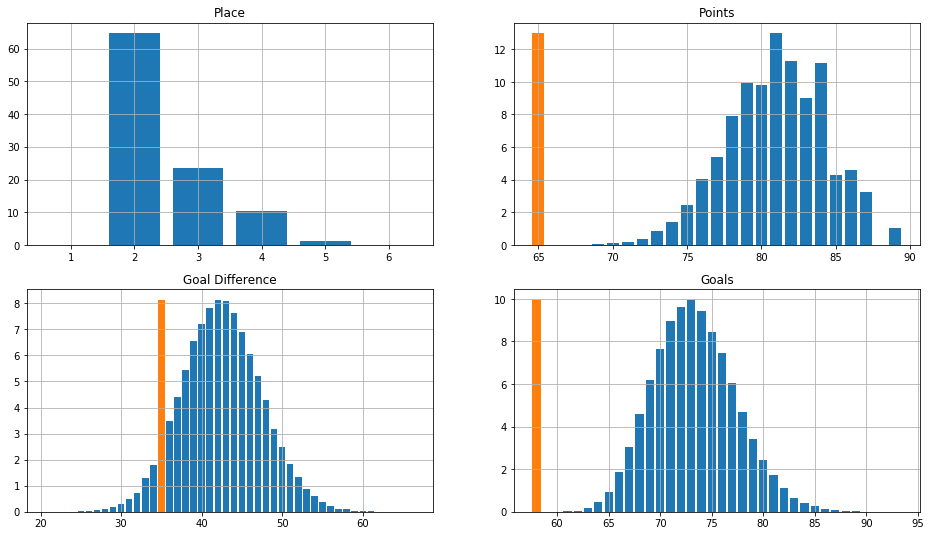

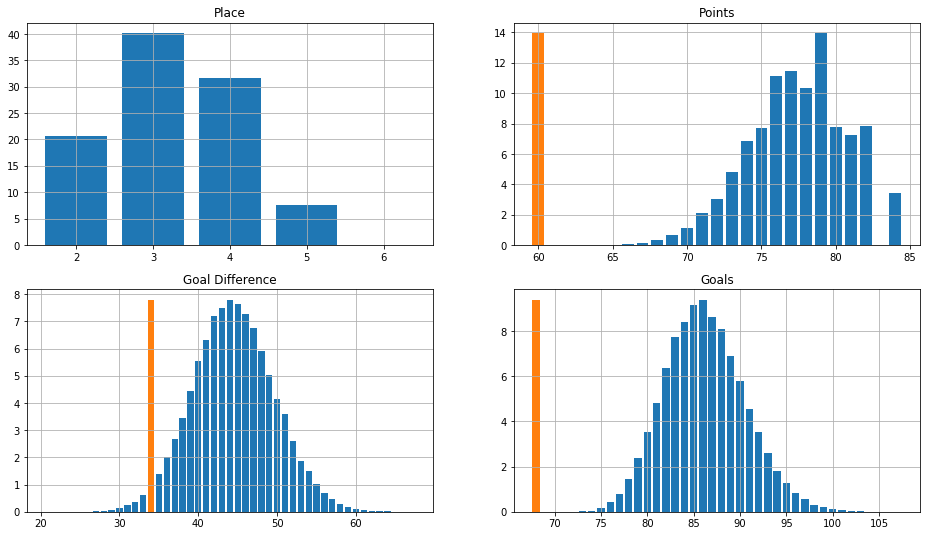

In [7]:
PremierLeague.team_report('Man United')
PremierLeague.team_report('Liverpool')

# Most important matches

array([ 98.817     ,  99.4219163 ,  96.0391532 ,  97.91819381])

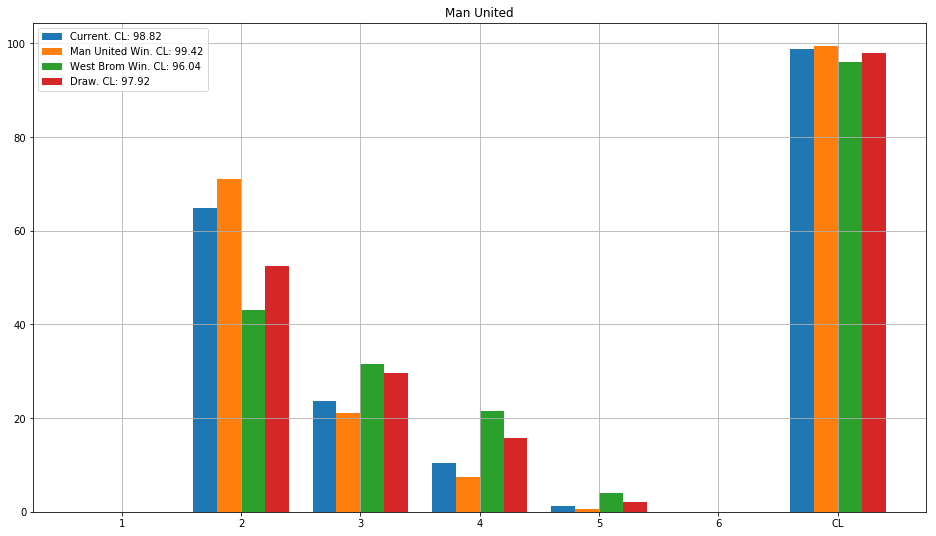

In [8]:
imp=[]
ref_team='Man United'
matches=[]
for x in PremierLeague.matches_to_sim:
    matches.append(x)
    pcl=PremierLeague.what_if(x,ref_team=ref_team,show_plot=False)
    #imp.append(pcl.max()/pcl.min())
    imp.append(pcl.std())
imp=np.array(imp)
matches=np.array(matches)
the_match=matches[imp.argmax()]
PremierLeague.what_if(the_match,ref_team=ref_team)

array([ 98.817     ,  98.08388996,  99.35238999,  98.96504242])

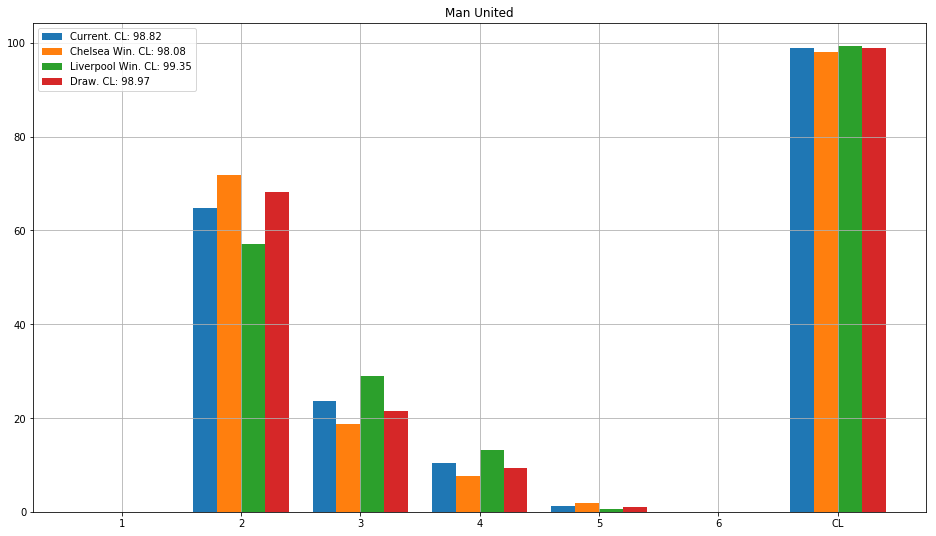

In [22]:
PremierLeague.what_if('Chelsea v Liverpool',ref_team=ref_team)

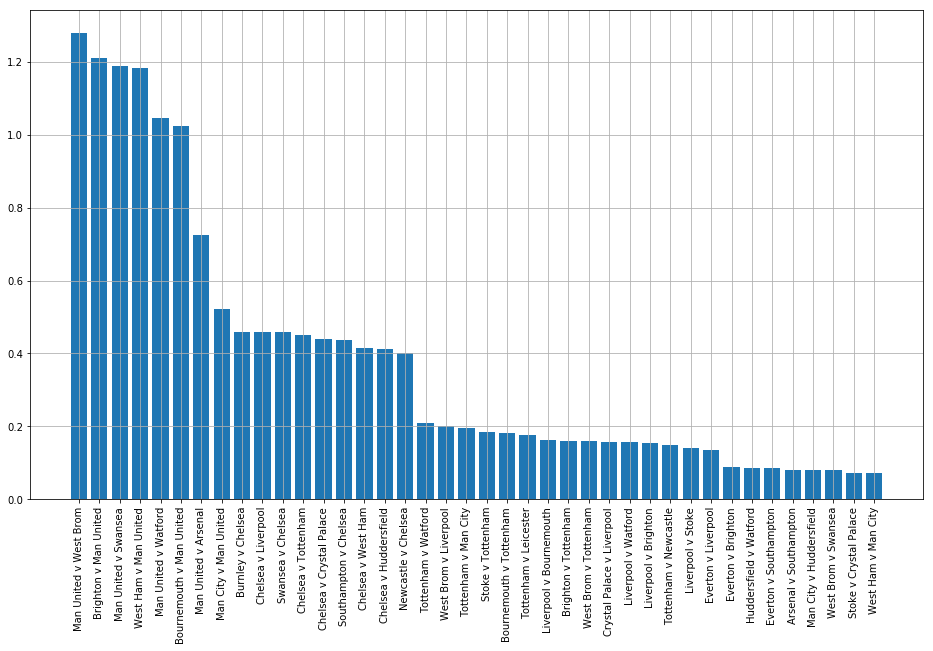

In [10]:
i_sort=(-imp).argsort()
matches=matches[i_sort]
imp=imp[i_sort]
xx=np.arange(40)
plt.bar(xx,imp[xx])
plt.xticks(xx,matches[xx],rotation=90);
plt.grid(True)

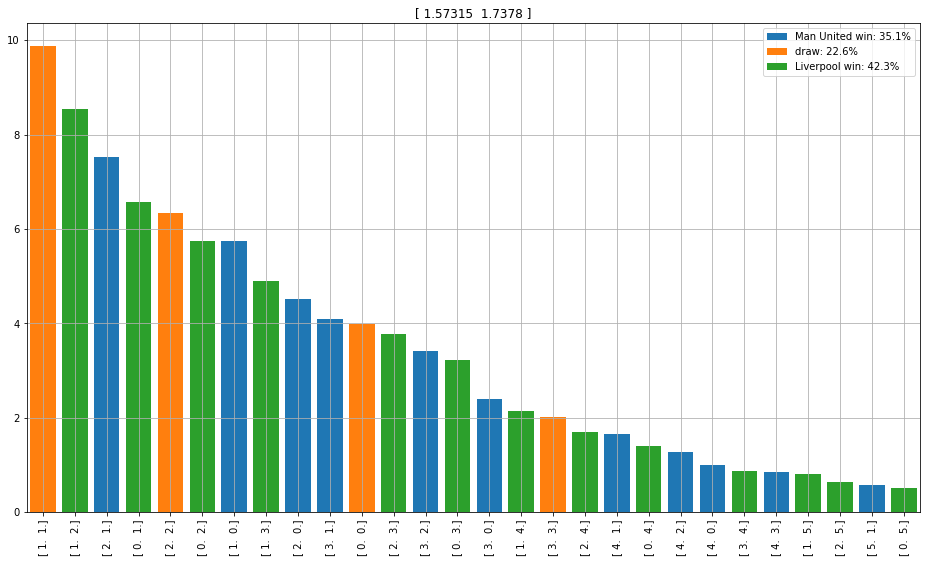

In [11]:
teams['Man United']+teams['Liverpool']

1.9968575

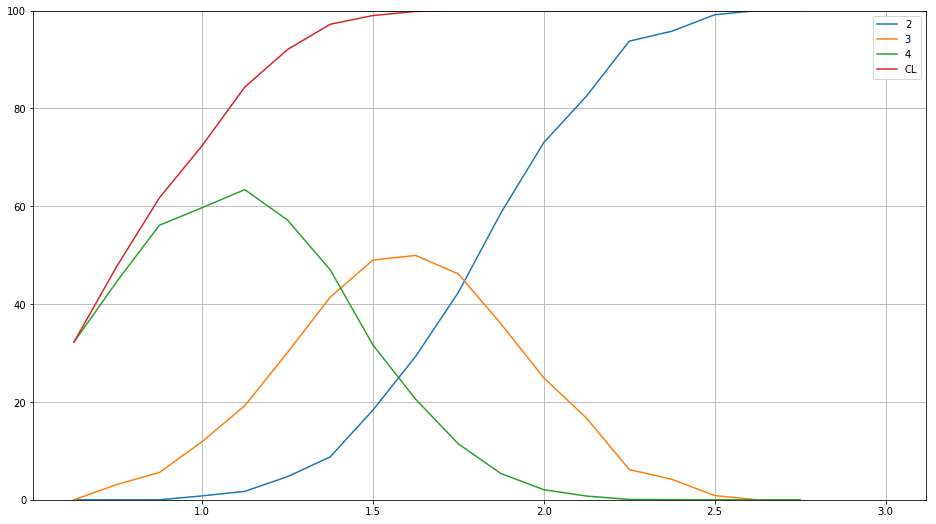

In [12]:
team_name='Man United'
#team_name='Tottenham'
#team_name='Chelsea'
#team_name='Liverpool'
i=PremierLeague.team_id[team_name]
ind=PremierLeague.place_per_team[i,:]<=4
tmp=[PremierLeague.matches_to_sim[x] for x in PremierLeague.matches_to_sim ]
n=len([x for x in tmp if x['Home']==team_name or x['Away']==team_name])
#pnts=PremierLeague.points_per_team[i,ind]-PremierLeague.current_points['Man United']
pnts=PremierLeague.points_per_team[i,:]-PremierLeague.current_points[team_name]
plc=PremierLeague.place_per_team[i,:]

nrpnts=np.arange(5,3*n+1)
p=np.zeros([nrpnts.shape[0],5])
p[:]=np.nan
for jj in range(nrpnts.shape[0]):
    ind=pnts==nrpnts[jj]
    if ind.any():
        p[jj,0]=(plc[ind]==2).sum()/ind.sum()
        p[jj,1]=(plc[ind]==3).sum()/ind.sum()
        p[jj,2]=(plc[ind]==4).sum()/ind.sum()
        p[jj,3]=(plc[ind]<=4).sum()/ind.sum()
    

plt.plot(nrpnts/n,100*p[:,0],label='2')
plt.plot(nrpnts/n,100*p[:,1],label='3')
plt.plot(nrpnts/n,100*p[:,2],label='4')
plt.plot(nrpnts/n,100*p[:,3],label='CL')
plt.legend()
plt.grid(True)
plt.ylim([0,100])
#plt.xlabel([0,3])
pnts.mean()/n

In [13]:
TeamSet={x:teams[x] for x in teams if teams[x].means()[0]>=1 and teams[x].country=='EN'}
#GoodTeams={x:teams[x] for x in teams if teams[x].means()[0]>=1.2}

In [14]:
CustomLeague=Season(TeamSet,nr_cl=2,nr_degr=1)
CustomLeague.process_current_results(all_data['EN'])
#CustomLeague.process_current_results(all_data['ES'])
#CustomLeague.process_current_results(all_data['DE'])
#CustomLeague.process_current_results(all_data['NL'])
#CustomLeague.process_current_results(all_data['FR'])
#CustomLeague.process_current_results(all_data['IT'])
#CustomLeague.simulate_season(n_scenarios=100000)

simulation not yet done, simulating
simulation not yet processed, processing


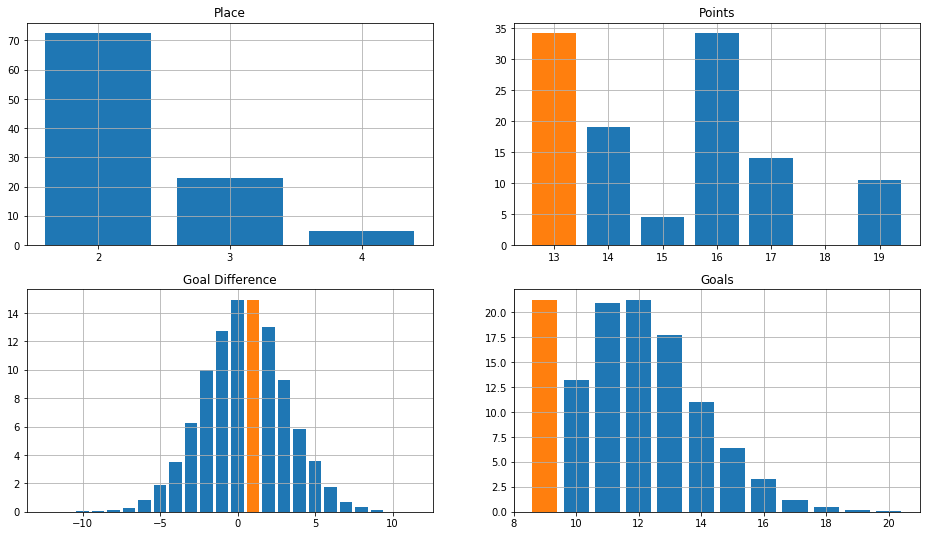

In [15]:
CustomLeague.team_report('Man United')

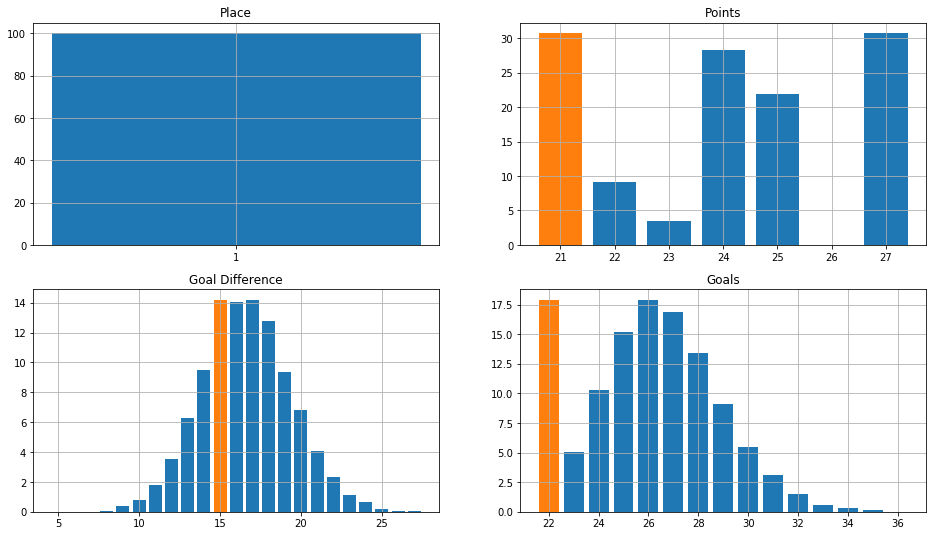

In [16]:
CustomLeague.team_report('Man City')

In [17]:
CustomLeague.season_report()

,Points (mean),Points (low),Points (high),Place (low),Place (high),Win,CL,Off,Deff,Degr
Man City,24.7,21,27,1,1,100.0,100.00,2.26,0.15,0.00
Man United,15.5,13,19,3,2,0.0,72.50,1.29,0.10,0.00
Tottenham,12.5,10,16,5,2,0.0,17.48,1.47,0.09,0.00
Chelsea,11.5,9,15,5,2,0.0,6.64,1.32,0.14,0.37
Liverpool,11.5,10,13,5,3,0.0,3.38,1.63,0.28,0.00
Arsenal,7.2,6,9,6,6,0.0,0.00,1.32,0.46,99.63


In [18]:
SpanishTeams={x:teams[x] for x in teams if teams[x].country=='ES'}
LaLiga=Season(SpanishTeams)
LaLiga.process_current_results(all_data['ES'])
LaLiga.simulate_season(n_scenarios=100000)

In [19]:
LaLiga.season_report()

simulation not yet processed, processing


,Points (mean),Points (low),Points (high),Place (low),Place (high),Win,CL,Off,Deff,Degr
Barcelona,95.1,89,100,1,1,99.37,100.00,2.18,0.10,0.00
Ath Madrid,82.0,75,89,3,2,0.59,99.99,1.10,0.04,0.00
Real Madrid,76.9,70,83,4,2,0.04,99.67,1.94,0.33,0.00
Valencia,71.2,64,78,5,3,0.00,94.30,1.23,0.42,0.00
Sevilla,60.9,54,68,9,5,0.00,4.06,0.97,0.45,0.00
Girona,57.8,51,65,11,5,0.00,1.04,0.93,0.34,0.00
Villarreal,57.1,51,64,11,5,0.00,0.67,0.82,0.30,0.00
Eibar,53.9,47,61,13,6,0.00,0.11,0.80,0.45,0.00
Getafe,53.6,47,60,13,6,0.00,0.08,0.71,0.19,0.00
Betis,52.1,45,59,14,6,0.00,0.03,1.03,0.83,0.00


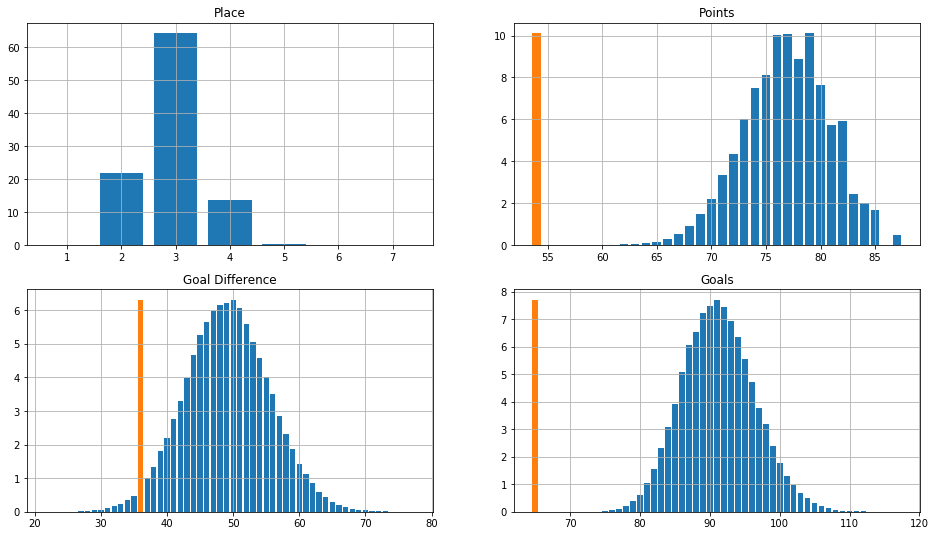

In [20]:
LaLiga.team_report('Real Madrid')

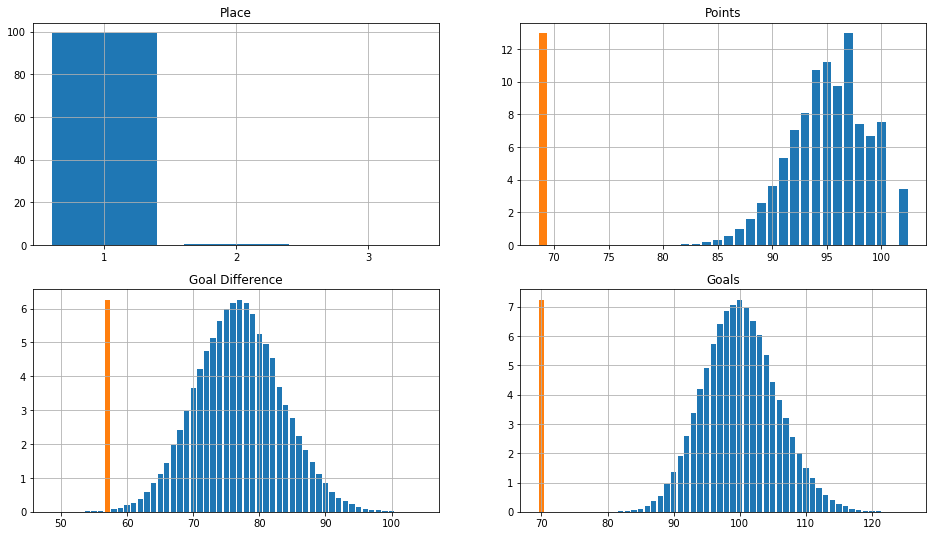

In [21]:
LaLiga.team_report('Barcelona')